# CAR PRICE PREDICTION

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phase - 

* Data Collection Phase

You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model
In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are 
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
at last target variable Price of the car. This data is to give you a hint about important variables in 
used car model. You can make changes to it, you can add or you can remove some columns, it 
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, 
Hatchback.

* Model Building Phase

After collecting the data, you need to build a machine learning model. Before model building do all 
data pre-processing steps. Try different models with different hyper parameters and select the best 
model.
Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

In [1]:
#importing libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r"C:/Users/mayuk/Car_Data.csv")
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,"2,200 km",Petrol,Manual,"5,25,000"
1,Hyundai,2013,"91,500 km",Diesel,Manual,"5,95,000"
2,Ford,2017,"36,000 km",Diesel,Manual,"7,75,000"
3,Honda,2015,"90,000 km",Diesel,Manual,"4,00,000"
4,Maruti Suzuki,2010,"40,000 km",Petrol,Manual,"2,30,000"
...,...,...,...,...,...,...
9995,Hyundai,2012,"65,000 km",Petrol,Manual,"3,25,000"
9996,Maruti Suzuki,2018,"85,000 km",CNG & Hybrids,Manual,"2,90,000"
9997,Maruti Suzuki,2010,"72,000 km",Petrol,Manual,"3,20,000"
9998,Tata,2012,"70,000 km",Diesel,Manual,"1,85,000"


In [3]:
df.shape

(10000, 6)

**Column Description:**

- Used Car Model - This shows the car model names
- Year of Manufacture - Gives us the year in which the car was made
- Kilometers Driven - Number of kilometers the car the driven reflecting on the Odometer
- Fuel Type - Shows the fuel type used by the vehicle
- Transmission Type - Gives us the manual or automatic gear shifting mechanism
- Used Car Price - Lists the selling price of the used cars

In [4]:
#Checking the info() method to get an a general idea about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Used Car Model       10000 non-null  object
 1   Year of Manufacture  10000 non-null  object
 2   Kilometers Driven    10000 non-null  object
 3   Fuel Type            10000 non-null  object
 4   Transmission Type    10000 non-null  object
 5   Used Car Price       10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


In [5]:
df.isna().sum() # checking for missing values

Used Car Model         0
Year of Manufacture    0
Kilometers Driven      0
Fuel Type              0
Transmission Type      0
Used Car Price         0
dtype: int64

<AxesSubplot:>

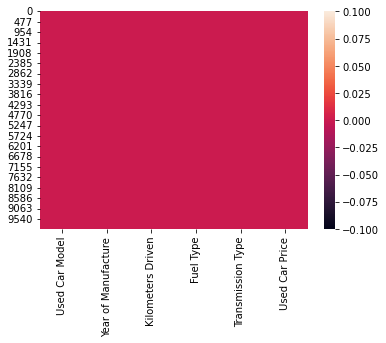

In [6]:
import seaborn as sns

sns.heatmap(df.isnull()) #Looking for null values if any, in heatmap

We can see there is no missing values.

In [7]:
value = ["Transmission Type", "Fuel Type", "Year of Manufacture"]
for col in value:
    print(col)
    print(df[col].value_counts())
    print("="*120)

Transmission Type
Manual       8408
Automatic    1402
-             190
Name: Transmission Type, dtype: int64
Fuel Type
Diesel           5345
Petrol           4386
CNG & Hybrids     108
CNG                57
-                  56
LPG                48
Name: Fuel Type, dtype: int64
Year of Manufacture
2017    1099
2016    1021
2018     983
2015     975
2012     844
2013     802
2014     798
2011     733
2019     642
2010     519
2009     366
2008     300
2007     207
2006     148
2020     132
2005     112
2004      71
2003      55
2002      45
-         44
1999      24
2000      24
2001      16
1997      11
2021      10
1998       9
1996       3
1994       3
1995       2
1983       1
1991       1
Name: Year of Manufacture, dtype: int64


In [8]:
# Data pre processing

df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: x.replace(',','') if x!='-' else '-')
df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: int(x.split(' ')[0]) if x!='-' else 0)
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,"5,25,000"
1,Hyundai,2013,91500,Diesel,Manual,"5,95,000"
2,Ford,2017,36000,Diesel,Manual,"7,75,000"
3,Honda,2015,90000,Diesel,Manual,"4,00,000"
4,Maruti Suzuki,2010,40000,Petrol,Manual,"2,30,000"
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,"3,25,000"
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,"2,90,000"
9997,Maruti Suzuki,2010,72000,Petrol,Manual,"3,20,000"
9998,Tata,2012,70000,Diesel,Manual,"1,85,000"


In [9]:
try:
    df["Used Car Price"]=df["Used Car Price"].apply(lambda x: x.split(' ')[1] if x!='-' else '0,0')
except IndexError:
    pass

try:
    df["Used Car Price"]=df["Used Car Price"].apply(lambda x: str(x.replace(',', '')))
except ValueError:
    pass

df["Used Car Price"]=df["Used Car Price"].str.strip() # removing extra white space from the column records
df["Used Car Price"]=pd.to_numeric(df["Used Car Price"].str.replace('-','0'), errors='coerce')
df["Used Car Price"]=df["Used Car Price"].astype(float) # converting object to float data type
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,525000.0
1,Hyundai,2013,91500,Diesel,Manual,595000.0
2,Ford,2017,36000,Diesel,Manual,775000.0
3,Honda,2015,90000,Diesel,Manual,400000.0
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,325000.0
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,290000.0
9997,Maruti Suzuki,2010,72000,Petrol,Manual,320000.0
9998,Tata,2012,70000,Diesel,Manual,185000.0


Our target label contained price values but was stored as object datatype therefore we first ensured that it is changed to proper numeric data and then converted to float data type.

In [10]:
df["Year of Manufacture"]=df["Year of Manufacture"].apply(lambda x: int(x.strip()[0:4]) if x!='-' else 0)
median_val_year=df["Year of Manufacture"].median()
df["Year of Manufacture"]=df["Year of Manufacture"].apply(lambda x: x if x!=0 else median_val_year)
df["Year of Manufacture"]=df["Year of Manufacture"].astype(int)
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,525000.0
1,Hyundai,2013,91500,Diesel,Manual,595000.0
2,Ford,2017,36000,Diesel,Manual,775000.0
3,Honda,2015,90000,Diesel,Manual,400000.0
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,325000.0
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,290000.0
9997,Maruti Suzuki,2010,72000,Petrol,Manual,320000.0
9998,Tata,2012,70000,Diesel,Manual,185000.0


Now we need to change the year from object to integer datatype but before that we have removed all "-" and replaced them with the median year value.

In [11]:
df["Fuel Type"]=df["Fuel Type"].apply(lambda x: x if x!='-' else 'Petrol') # replacing with common fuel type in india
df["Transmission Type"]=df["Transmission Type"].apply(lambda x: x if x!='-' else 'Manual') # common transmission is manual
df["Used Car Model"]=df["Used Car Model"].apply(lambda x: x if x!='-' else 'Hyundai') # common used car model
df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: x if x!='-' else 'None')
avg_usedcar_price=df["Used Car Price"].mean()
df["Used Car Price"]=df["Used Car Price"].apply(lambda x: x if x!='-' else avg_usedcar_price) # average used car prices
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,525000.0
1,Hyundai,2013,91500,Diesel,Manual,595000.0
2,Ford,2017,36000,Diesel,Manual,775000.0
3,Honda,2015,90000,Diesel,Manual,400000.0
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,325000.0
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,290000.0
9997,Maruti Suzuki,2010,72000,Petrol,Manual,320000.0
9998,Tata,2012,70000,Diesel,Manual,185000.0


In [12]:
for col in value:
    print(col)
    print(df[col].value_counts())
    print("="*100)

Transmission Type
Manual       8598
Automatic    1402
Name: Transmission Type, dtype: int64
Fuel Type
Diesel           5345
Petrol           4442
CNG & Hybrids     108
CNG                57
LPG                48
Name: Fuel Type, dtype: int64
Year of Manufacture
2017    1099
2016    1021
2018     983
2015     975
2012     844
2014     842
2013     802
2011     733
2019     642
2010     519
2009     366
2008     300
2007     207
2006     148
2020     132
2005     112
2004      71
2003      55
2002      45
1999      24
2000      24
2001      16
1997      11
2021      10
1998       9
1996       3
1994       3
1995       2
1983       1
1991       1
Name: Year of Manufacture, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Used Car Model       10000 non-null  object 
 1   Year of Manufacture  10000 non-null  int32  
 2   Kilometers Driven    10000 non-null  int64  
 3   Fuel Type            10000 non-null  object 
 4   Transmission Type    10000 non-null  object 
 5   Used Car Price       10000 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 429.8+ KB


In [14]:
df.describe(include="all")

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
count,10000,10000.00000,1.000000e+04,10000,10000,1.000000e+04
unique,2055,NaN,NaN,5,2,NaN
top,Maruti Suzuki,NaN,NaN,Diesel,Manual,NaN
freq,602,NaN,NaN,5345,8598,NaN
mean,NaN,2013.69860,6.914651e+04,NaN,NaN,6.608371e+05
std,NaN,4.02124,5.868048e+04,NaN,NaN,1.204508e+06
min,NaN,1983.00000,0.000000e+00,NaN,NaN,0.000000e+00
25%,NaN,2011.00000,3.500000e+04,NaN,NaN,2.549990e+05
50%,NaN,2014.00000,6.000000e+04,NaN,NaN,4.500000e+05
75%,NaN,2017.00000,9.000000e+04,NaN,NaN,6.770000e+05


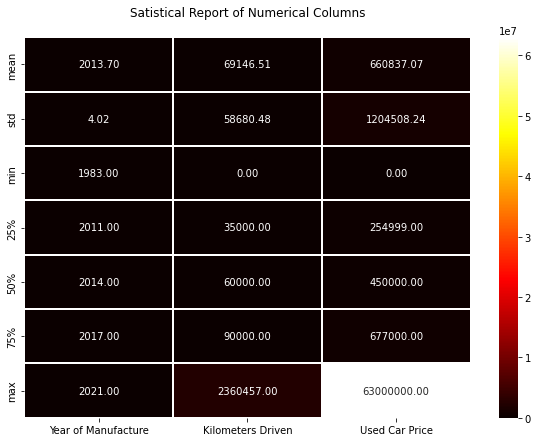

In [15]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

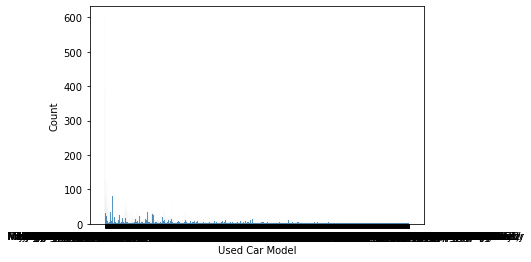

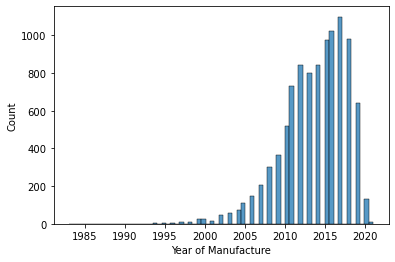

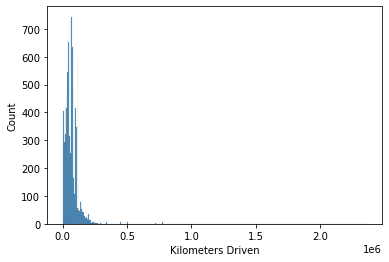

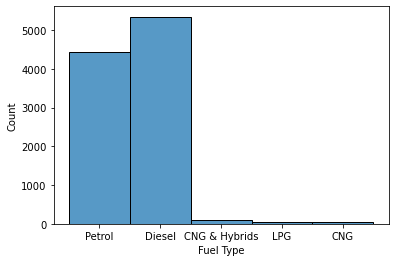

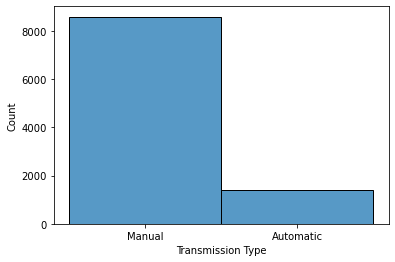

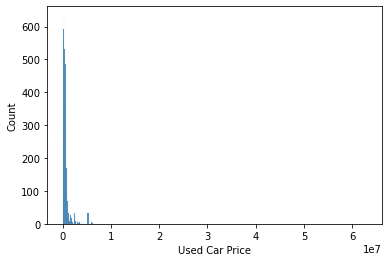

In [16]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

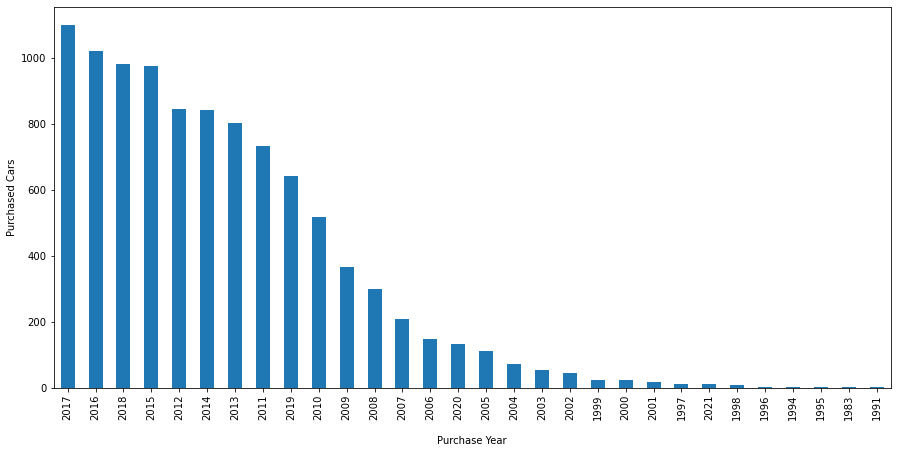

In [17]:
plt.figure(figsize=[15,7])
purchased_car_per_year = df['Year of Manufacture'].value_counts()
purchased_car_per_year.plot(kind='bar')
plt.xlabel("\nPurchase Year")
plt.ylabel("Purchased Cars")
plt.show()

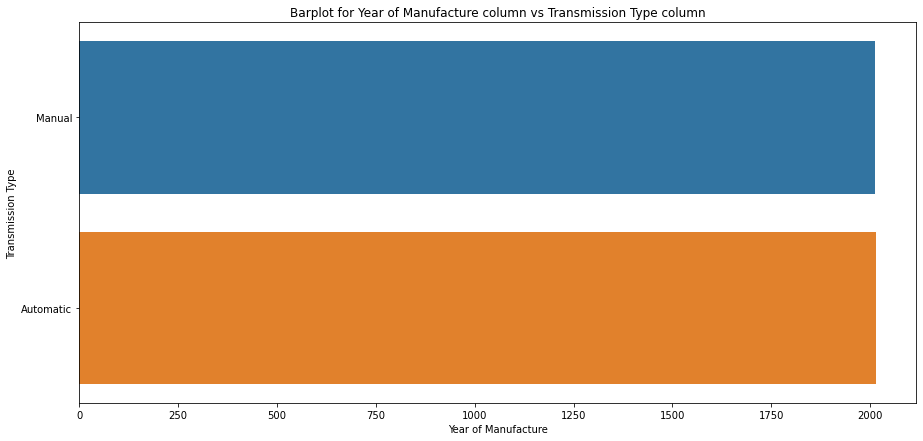

In [18]:
y = 'Transmission Type'

x = 'Year of Manufacture'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

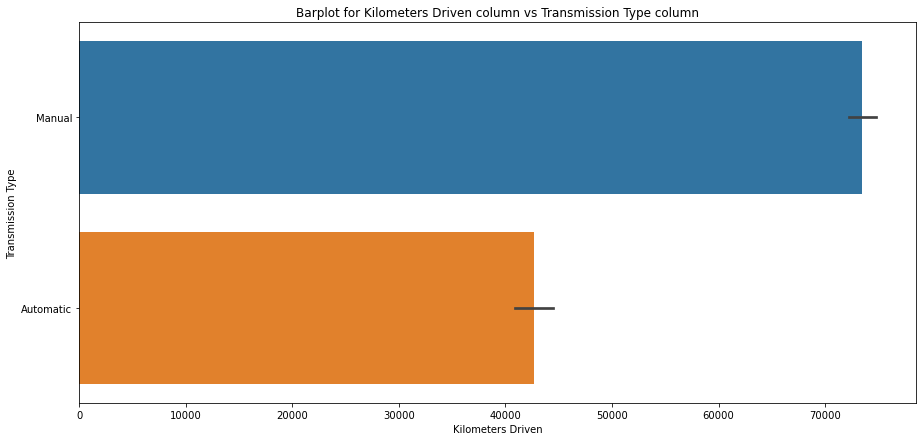

In [19]:
y = 'Transmission Type'

x = 'Kilometers Driven'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

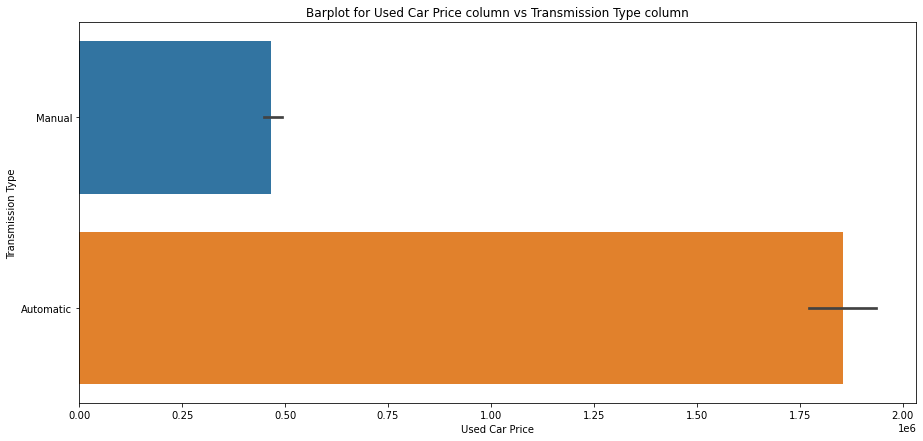

In [20]:
y = 'Transmission Type'

x = 'Used Car Price'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

Year of manufacture for both manual and automatic gear shifting cars are same

Kilometers driven for manual cars are more than that of their automatic counterparts

Used Car price for automatic one's are way higher than the manual cars.

The number of cars being purchased each year has increased a lot after 2008. Most of the people started preferring to get used cars and all the available online sources helped in expediting genuine process of getting good quality used cars with hassle free Registration Certificate (RC) transfers.


<Figure size 1080x720 with 0 Axes>

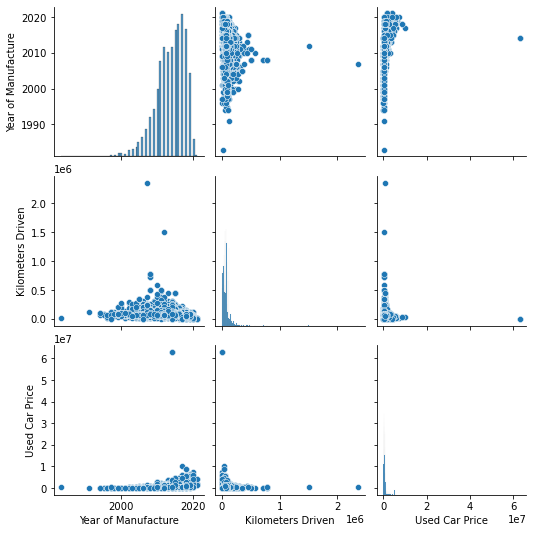

In [21]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

# Encoding

In [22]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

column=["Transmission Type", "Fuel Type", "Used Car Model"]
df=ordinal_encode(df, column)
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,460.0,2017,2200,4.0,1.0,525000.0
1,460.0,2013,91500,2.0,1.0,595000.0
2,186.0,2017,36000,2.0,1.0,775000.0
3,318.0,2015,90000,2.0,1.0,400000.0
4,1274.0,2010,40000,4.0,1.0,230000.0
...,...,...,...,...,...,...
9995,460.0,2012,65000,4.0,1.0,325000.0
9996,1274.0,2018,85000,1.0,1.0,290000.0
9997,1274.0,2010,72000,4.0,1.0,320000.0
9998,1633.0,2012,70000,2.0,1.0,185000.0


In [23]:
#Checking shape
df.shape

(10000, 6)

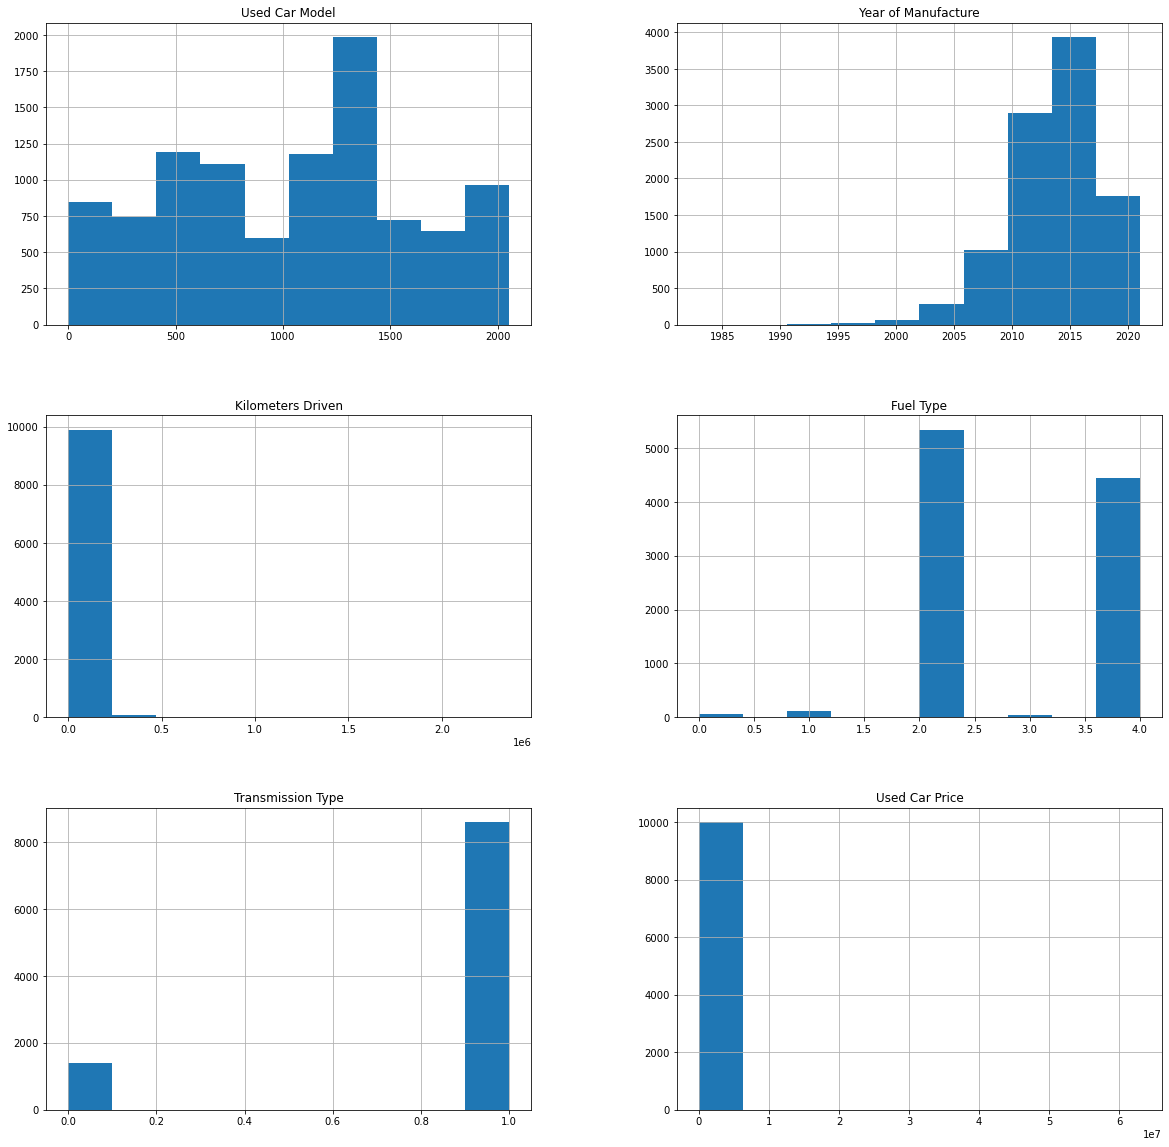

In [24]:
df.hist(figsize=(20,20))
plt.show()

# Checking Correlation:

In [25]:
df.corr()

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
Used Car Model,1.000000,-0.019128,0.098858,-0.094476,0.065399,-0.074662
Year of Manufacture,-0.019128,1.000000,-0.391988,-0.051844,-0.234196,0.278422
Kilometers Driven,0.098858,-0.391988,1.000000,-0.245473,0.182361,-0.147619
Fuel Type,-0.094476,-0.051844,-0.245473,1.000000,-0.028822,-0.111789
Transmission Type,0.065399,-0.234196,0.182361,-0.028822,1.000000,-0.400351
Used Car Price,-0.074662,0.278422,-0.147619,-0.111789,-0.400351,1.000000


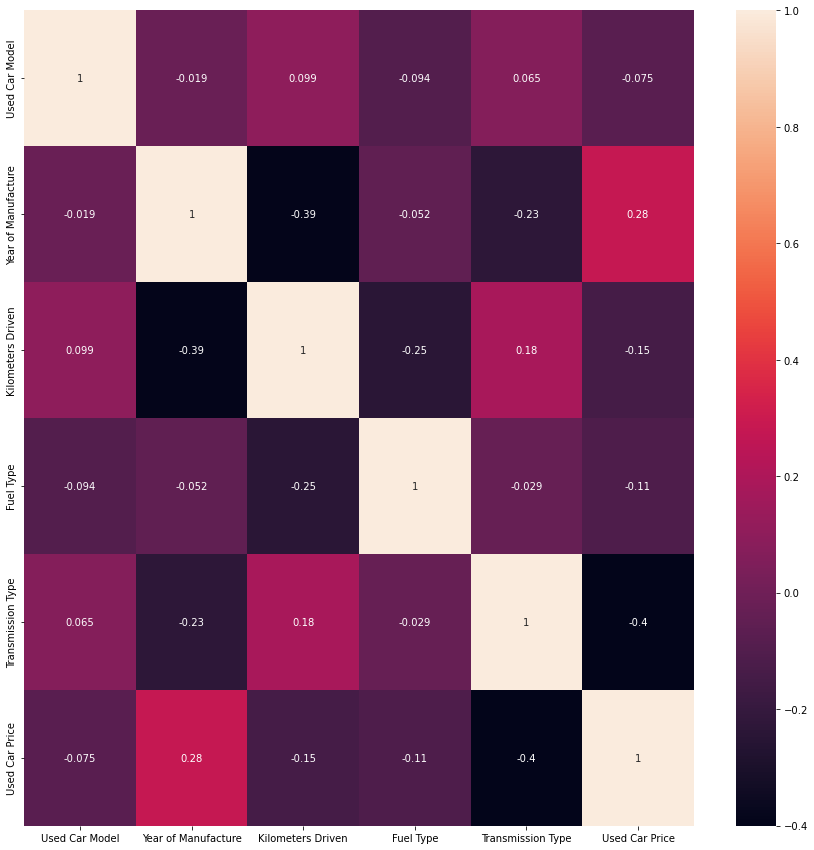

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In the above correlation heatmap we can see that only "Year of Manufacture" is positively correlated with our label column while the other feature columns are negatively correlated. Also we see no multi collinearity concerns between the feature variables and will not have to worry about the same.



# Outliers:

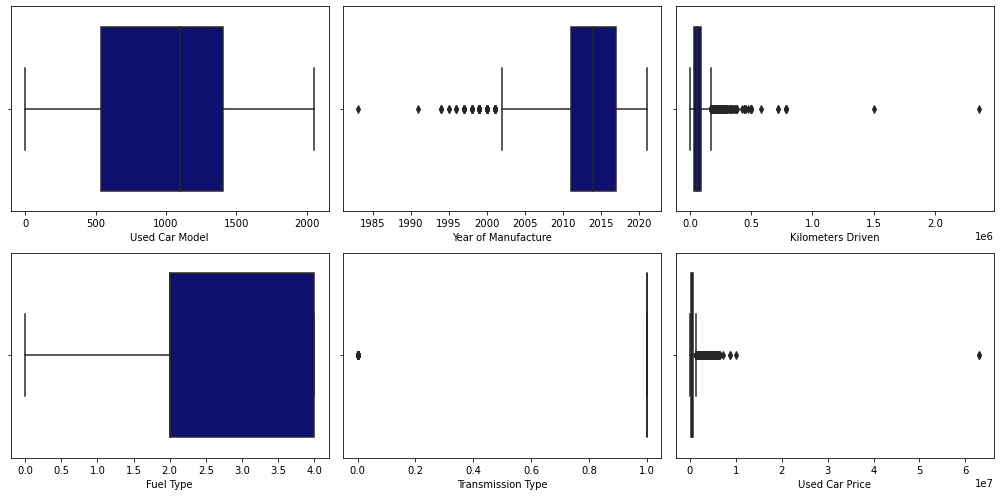

In [27]:
plt.figure(figsize=(14,7))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(2, 3, i+1)
    ax = sns.boxplot(df[outl_df[i]], color='navy')
    plt.tight_layout()

We can see, there are outliers present in the dataset.

In [28]:
# Using Z Score to remove outliers

z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (10000, 6)
Shape of the dataframe after removing outliers:  (9660, 6)
Percentage of data loss post outlier removal:  3.4000000000000004


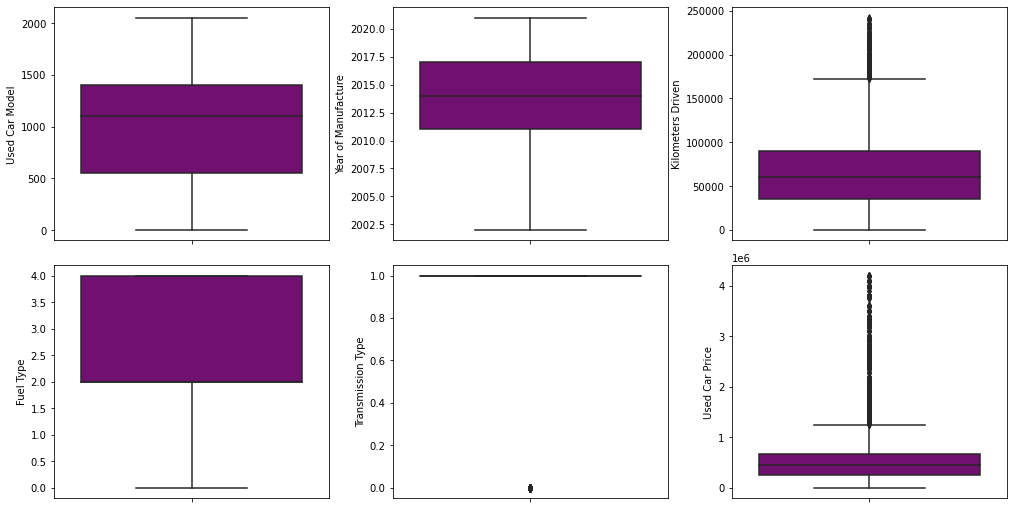

In [29]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

Now we can see there is no outlier in the data.

# Skewness

In [30]:
df.skew()

Used Car Model        -0.050582
Year of Manufacture   -0.654635
Kilometers Driven      0.839812
Fuel Type              0.064673
Transmission Type     -2.214140
Used Car Price         3.132993
dtype: float64

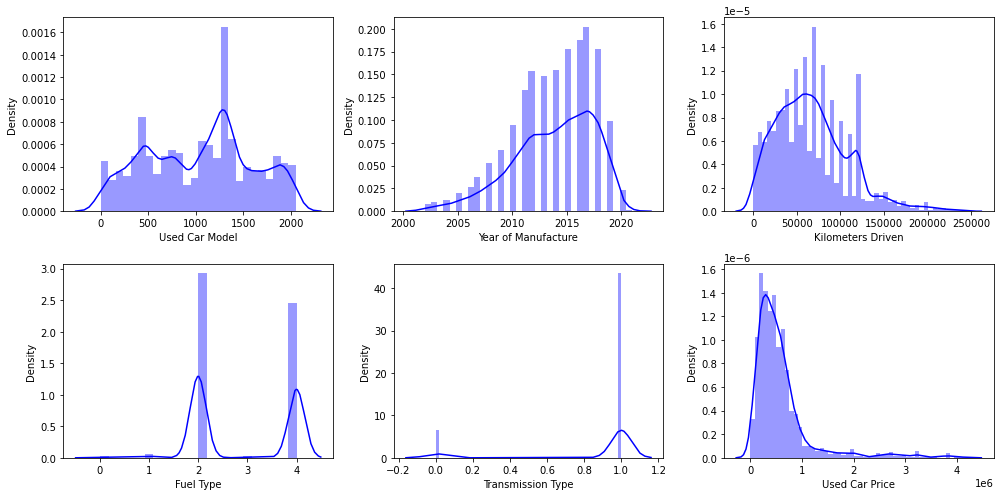

In [31]:
plt.figure(figsize=(14,7))
for i in range(0, len(outl_df)):
    plt.subplot(2, 3, i+1)
    ax = sns.distplot(df[outl_df[i]], color='blue')
    plt.tight_layout()

We can observe skewness in the data.

In [32]:
# Using Log Transform to fix skewness

df_log=df.copy()
for col in df_log.columns:
    if df_log.skew().loc[col]>0.55:
        df_log[col]=np.log1p(df_log[col])

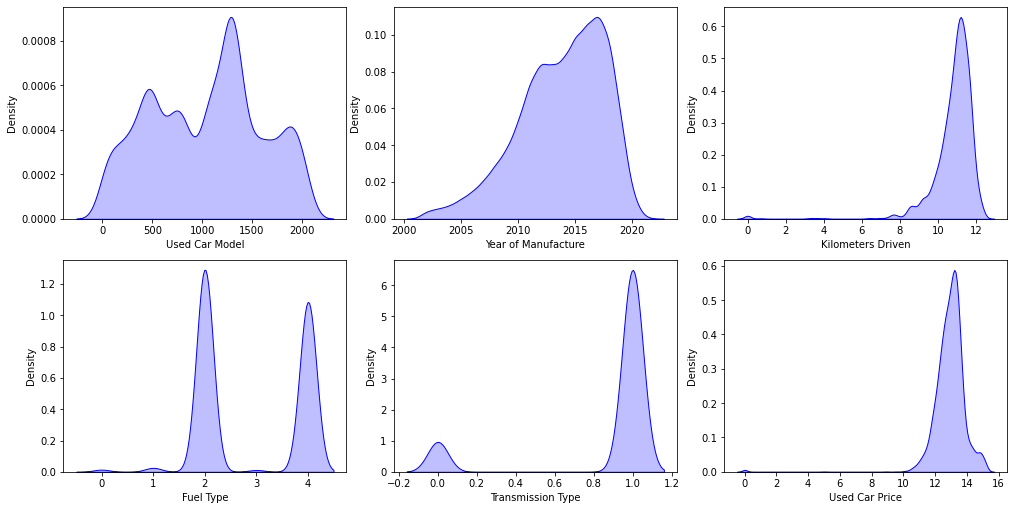

In [33]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14,7))
index = 0
ax = ax.flatten()
for col, value in df_log.items():
    sns.distplot(value, ax=ax[index], hist=False, color="b", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

With the help of above distribution plots I see that almost all the columns now have a bell shape curve retaining the normal distribution form.

In [34]:
X = df_log.drop('Used Car Price', axis=1)
Y = df_log['Used Car Price']

# Feature Scaling

In [35]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type
0,-1.049778,0.859016,-2.676651,1.092489,0.38482
1,-1.049778,-0.216389,0.540315,-0.853025,0.38482
2,-1.546103,0.859016,-0.264741,-0.853025,0.38482
3,-1.306997,0.321313,0.526049,-0.853025,0.38482
4,0.424706,-1.022943,-0.173812,1.092489,0.38482


# Finding the best random state

In [36]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu*100,"on Random State", maxRS)

Best R2 score is 57.550268240713386 on Random State 251


In [37]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=251)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [38]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.6055563352393261
R2 Score is: 57.550268240713386
Cross Validation Score: 52.8753376052149
R2 Score - Cross Validation Score is 4.674930635498484


In [39]:
# Ridge Regularization

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.6054680731075804
R2 Score is: 57.562641757596765
Cross Validation Score: 52.93925429374748
R2 Score - Cross Validation Score is 4.623387463849284


In [40]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.6090026450103327
R2 Score is: 57.065718051997564
Cross Validation Score: 52.23304894607056
R2 Score - Cross Validation Score is 4.832669105927003


In [41]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.3994657881385297
R2 Score is: 81.52752756070772
Cross Validation Score: 77.13651717434307
R2 Score - Cross Validation Score is 4.3910103863646555


In [42]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.6578919416139654
R2 Score is: 49.89570220461564
Cross Validation Score: 47.28624594828987
R2 Score - Cross Validation Score is 2.609456256325771


In [43]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.3648869894070707
R2 Score is: 84.58716239042191
Cross Validation Score: 80.38905060445025
R2 Score - Cross Validation Score is 4.198111785971662


As we can see, we are getting the best R2 score at Decision Trees Regressor.We are proceeding with this model.


# Hyper parameter tuning

In [44]:
# Choosing Decision Trees Regressor

fmod_param = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
              'max_depth' : [1,2,3,4,5,6,7,8,9,10,15,17,18,19,20],
              'random_state' : [42, 251, 340],
              'splitter' : ['best', 'random'],
              'min_samples_split' : [1,2,3,4,5,6,7,8,9,10],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf':[1,2,3,4,5]
             }

GSCV = GridSearchCV(DecisionTreeRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)
GSCV.best_params_

GSCV_pred=GSCV.best_estimator_.predict(X_test)
r2_score(Y_test, GSCV_pred)

0.7168252446549023

In [49]:
GSCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 18,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'random_state': 251,
 'splitter': 'best'}

In [45]:
Final_Model = DecisionTreeRegressor(criterion="squared_error", random_state=221,min_samples_split=2,min_samples_leaf=1)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 72.17968167022254


# Prediction of Used Car Price

In [46]:
import numpy as np
a=np.array(Y_test)
df_com=pd.DataFrame({"original":a,"Predicted":fmod_pred},index=range(len(a)))
df_com

,original,Predicted
0,13.171155,13.161586
1,14.690980,14.690980
2,12.154785,12.611541
3,13.235694,13.173116
4,13.321216,13.321216
...,...,...
2410,12.807655,12.750151
2411,13.017005,13.071072
2412,13.270785,13.253161
2413,11.695255,12.264346


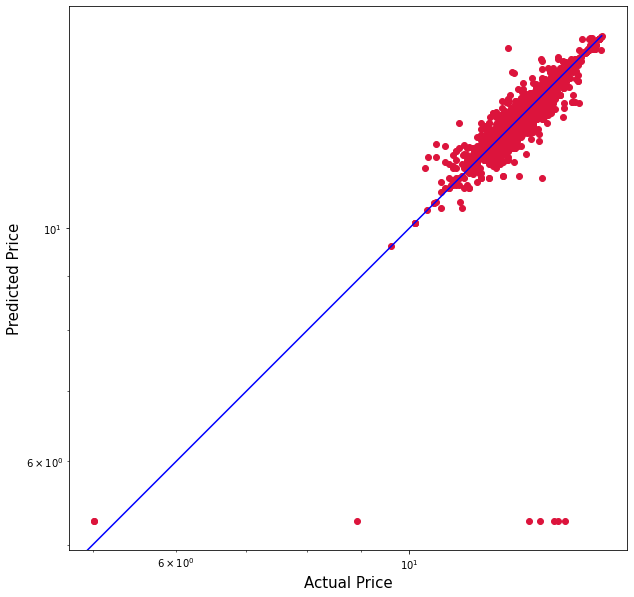

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, fmod_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(fmod_pred), max(a))
p2 = min(min(fmod_pred), min(a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.axis('equal')
plt.show()

# Saving the best model

In [48]:
filename = "CarPricePrediction.pkl"
joblib.dump(Final_Model, filename)

['CarPricePrediction.pkl']